In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Import preprocessed dataframes
%store -r df1
%store -r speeches_debates_df

In [13]:
# Select only great speeches
is_speech = df1['type']=='great_speech'
speeches = df1[is_speech]

# List of debater names
speakers = speeches['debater'].unique()
a = (map(lambda x: x.lower(), speakers))
speakers = list(a)
speakers_ls = speeches['debater']

# Define stopwords
stop_words = stopwords.words('english')
stop_words.extend(['--', 'michael e eidenmuller', 'people', 'would', 'authenticity', 'certified', 'text', 'version', 'transcribed', 'directly',\
                'audio', '--', 'aa', '?', ';', 'page', '12/31/21', ')', ',', "n't", '(', ']',\
                '!', 'updated', '12/11/21', 'update', "``", "''", 'rr', "'ve", "'s",\
                'authenticity', 'certified', 'text', 'version', 'transcribed', 'directly',\
                'audio', '--', 'aa', '?', ';', 'page', '12/31/21', ')', ',', "n't", '(', ']',\
                '[', '!', 'updated', '12/11/21', 'update', "``", "''", 'rr', "'ve", "'s",\
                'mmeerriiccaann', 'hheettoorriiccccoomm', 'hheettoorriicc', '..', ',', ':', \
                'ccoomm', 'transcription', 'americanrhetoric.com','and', 'the', 'to', 'of', 'in',\
                'that', 'is', 'a', 'have', 'with', 'be', 'this', 'as', 'by', 'those', '--', 'are', \
                'but', 'your',  'for', 'they', 'here', 'their', 'but', 'were', 'at', 'aa', 'rr', 'www',\
                'mmeerriiccaann', 'hheettoorriicc..ccoomm', 'transcription','1','2','3', 'transcription',\
                'americanrhetoric.com', 'updated', '12/31/21', 'page','ccoomm','hheettoorriicc','would','11',\
                'michael','e','eidenmuller','also','americanrhetoric','com','w','oodrow','ilson','mauricio',\
                'garcia','21','10','12','may','let','new','say','said','make','go','mr','come','could',\
                'get','many','authenticity', 'certified', 'text', 'version', 'transcribed', 'directly', 'audio', '--', \
                'aa', '?', ';', 'page', '12/31/21', ')', ',', "n't", '(', ']', '[', '!', 'updated', '12/11/21', 'update', \
                "``", "''", 'rr', "'ve", "'s", 'mmeerriiccaann', 'hheettoorriiccccoomm', 'hheettoorriicc', '..', ',', ':',\
                'ccoomm', 'transcription', 'americanrhetoric.com', "trump","clinton","mccain","brownback", "bachmann", "bauer", \
                "bradley", "bush", "cain", "carson", "christie", "cruz", "dodd", "edwards", "forbes", "gbush", "gimore", "gingrich",\
                "giuliani", "gore", "graham", "hatch", "huckabee", "hunter", "huntsman", "jindal", "johnson", "kaine", \
                "kasich", "obama", "pataki", "paul", "pawlenty", "perry", "richardson", "romney", \
                "rubio", "sanders", "santorum", "tancredo", "thompson", "walker", "webb", '12/10/21', '1/28/22', '1/28/22'])
# Create dataframe
data_dict = {'debater': speakers_ls, 'text': speeches['lemmatized']}
data = pd.DataFrame(data_dict)

# Tokenize words
#data_words = data['text'].apply(word_tokenize)
data_words = speeches['lemmatized'].apply(word_tokenize)

# Remove stop words
data_words = data_words.apply(lambda x: [word for word in x if word not in (stop_words)])


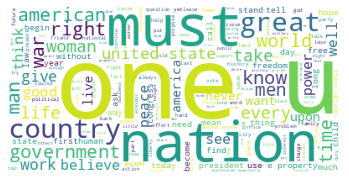

In [4]:
# Print wordcloud of all speeches
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

long_string = ' '.join([x for l in data_words for x in l])

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')


wordcloud.generate(long_string)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [5]:
# Preview most frequent words
from nltk import FreqDist

long_string = ' '.join([x for l in data_words for x in l])

all_words = long_string.split()
fdist = FreqDist(all_words) # a frequency distribution of words (word count over the corpus)
k = 75 # Number of words to remove
top_k_words, _ = zip(*fdist.most_common(k)) # unzip the words and word count tuples

# New stop words
extended_stop_words = list(top_k_words)

# Smaller dataframe
data_words2 = data_words.apply(lambda x: [word for word in x if word not in (extended_stop_words)])

('.', 'right', 'one', 'war', 'us', 'nation', 'great', 'state', 'government', 'world', 'man', 'must', 'country', 'men', 'american', 'time', 'know', 'woman', 'every', 'year', 'property', 'take', 'president', 'united', 'life', 'upon', 'peace', 'public', 'give', 'e.', 'work', 'america', 'power', 'believe', 'good', 'day', 'human', 'live', 'think', 'never', 'want', 'mr.', 'see', 'freedom', 'well', 'thing', 'need', 'today', 'party', 'tell', 'even', 'shall', 'congress', 'force', 'law', 'free', 'way', 'first', 'use', 'without', 'ask', 'question', 'child', 'call', 'like', 'much', 'vote', 'hope', 'begin', 'find', 'political', 'stand', 'mean', 'place', 'copyright')


In [14]:
import gensim

# Create bigrams and trigrams
bigram = gensim.models.Phrases(data_words2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words2], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See bigram example
print(bigram_mod[bigram_mod[data_words2][374]])

['franklin', 'd.', 'roosevelt', 'pearl', 'harbor', 'address_deliver', '8', 'december', '1941', 'washington_d.c.', 'vice', 'speaker', 'member', 'senate', 'house', 'representative', 'yesterday', 'december', '7th', '1941', 'date', 'infamy', 'unite', 'suddenly', 'deliberately', 'attack', 'naval', 'air', 'empire', 'japan', 'solicitation', 'japan', 'still', 'conversation', 'emperor', 'look', 'toward', 'maintenance', 'pacific', 'indeed', 'hour', 'japanese', 'air', 'squadron', 'commence', 'bomb', 'island', 'oahu', 'japanese', 'ambassador', 'colleague', 'deliver', 'secretary', 'formal', 'reply', 'recent', 'message', 'reply', 'seem', 'useless', 'continue', 'exist', 'diplomatic', 'negotiation', 'contain', 'threat', 'hint', 'arm', 'attack.1', 'record', 'distance', 'hawaii', 'japan', 'obvious', 'attack', 'deliberately', 'plan', 'week', 'ago', 'intervene', 'japanese', 'deliberately', 'seek', 'deceive', 'false', 'statement', 'expression', 'continue', 'attack', 'yesterday', 'hawaiian', 'island', 'caus

In [15]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [16]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words2)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words2)

In [17]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 3), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 10), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [10]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.002*"family" + 0.002*"long" + 0.002*"ever" + 0.002*"home" + '
  '0.002*"history" + 0.002*"purpose" + 0.002*"become" + 0.002*"million" + '
  '0.002*"help" + 0.002*"national"'),
 (1,
  '0.002*"white" + 0.002*"black" + 0.002*"two" + 0.002*"national" + '
  '0.002*"problem" + 0.002*"future" + 0.002*"become" + 0.002*"help" + '
  '0.002*"long" + 0.002*"money"'),
 (2,
  '0.002*"white" + 0.002*"black" + 0.002*"help" + 0.002*"long" + '
  '0.002*"liberty" + 0.002*"national" + 0.002*"part" + 0.002*"fight" + '
  '0.002*"history" + 0.002*"last"'),
 (3,
  '0.002*"last" + 0.002*"fact" + 0.002*"long" + 0.002*"whether" + 0.002*"end" '
  '+ 0.002*"history" + 0.002*"word" + 0.002*"help" + 0.002*"look" + '
  '0.002*"part"'),
 (4,
  '0.002*"young" + 0.002*"family" + 0.002*"money" + 0.002*"last" + '
  '0.002*"history" + 0.002*"two" + 0.002*"citizen" + 0.002*"long" + '
  '0.002*"million" + 0.002*"national"')]


In [59]:
import pickle, os
import pyLDAvis.gensim_models

%cd "/root/.jupyter/FINAL/assets/"
cwd = os.getcwd()


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = ''.join(cwd+str('/')+str('great_speeches')+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')

LDAvis_prepared

/root/.jupyter/Amar/visualizations


/root/venv1/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.000096 -0.004337       1        1  41.029873
0      0.002644  0.002151       2        1  20.751190
1      0.002749 -0.000444       3        1  17.043476
2     -0.004798  0.000544       4        1  15.560311
4     -0.000691  0.002085       5        1   5.615150, topic_info=          Term        Freq       Total Category  logprob  loglift
1144   history  154.000000  154.000000  Default  30.0000  30.0000
666       part  137.000000  137.000000  Default  29.0000  29.0000
85        help  155.000000  155.000000  Default  28.0000  28.0000
417     effort  108.000000  108.000000  Default  27.0000  27.0000
111       last  146.000000  146.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
442       ever    7.327471  152.883304   Topic5  -6.5298  -0.1583
1297   present    6.732891  115.663828   Topic5  -6.6144   0.0360
700    problem    7.054470  143.045249   Topic5  -6.5678  -0.1298
101   interest    6.926946  133.893470   Topic5  -6.5860  -0.0819
490     future    6.858081  126.830246   Topic5  -6.5960  -0.0377

[455 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1682      1  0.512426        $
1682      2  0.198359        $
1682      3  0.132239        $
1682      4  0.099179        $
1682      5  0.049590        $
...     ...       ...      ...
2080      2  0.204257    young
2080      3  0.156597    young
2080      4  0.149789    young
2080      5  0.054469    young
7400      1  0.716436  zachary

[1219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5])

/root/venv1/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/venv1/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
